In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
# loading the data to variable Data
Data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")


In [3]:
Data.shape

(303, 14)

Through the above code it is known that the data contains the 303 observations  from different source and 14 features or columns.

In [4]:
Data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
Data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:

Data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
Data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

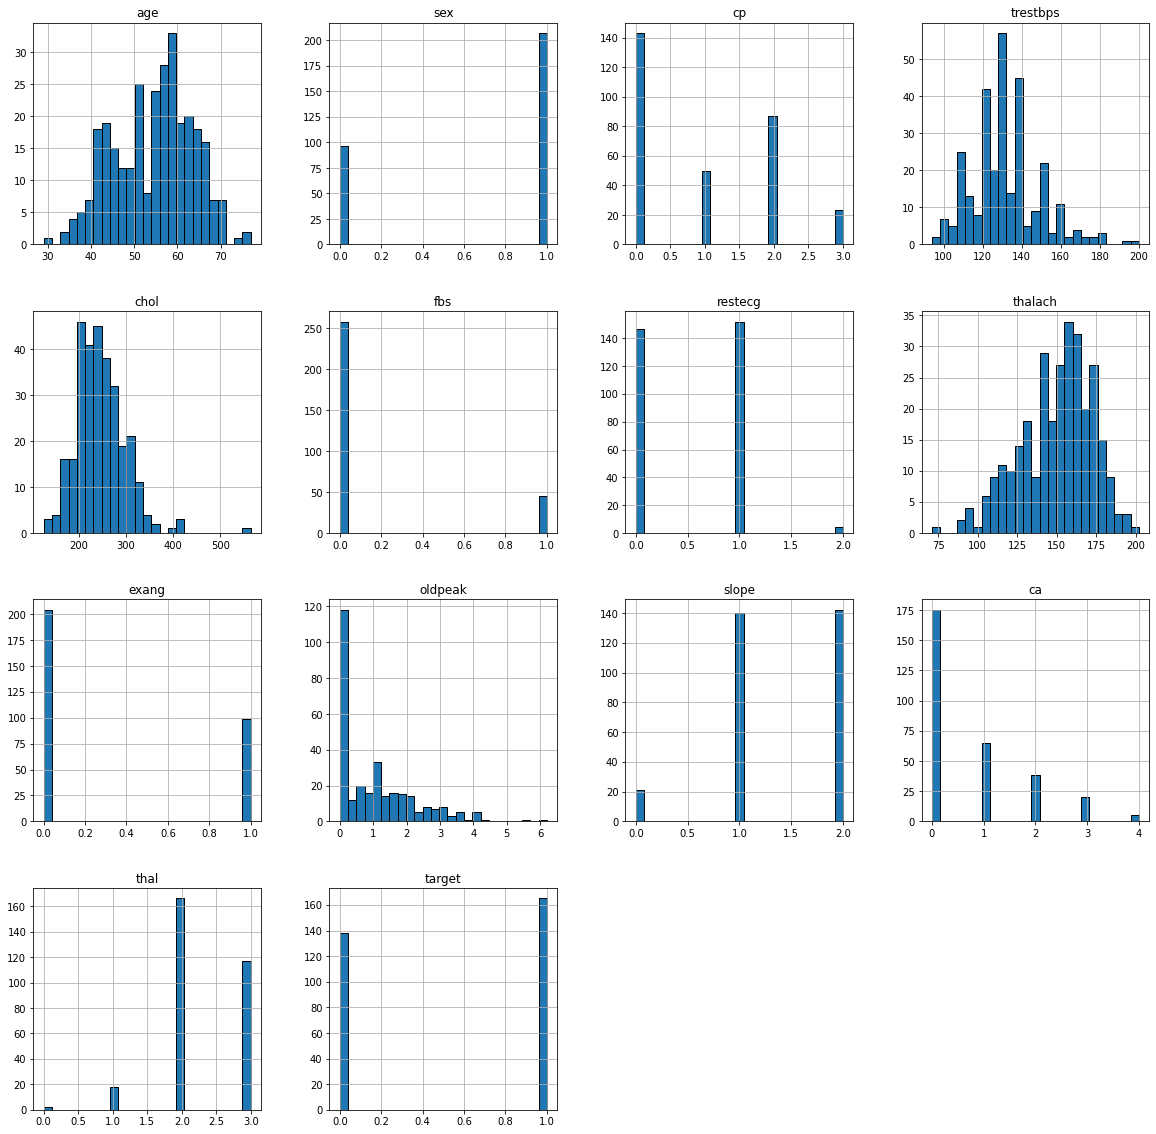

In [8]:
Data.hist(edgecolor='black',bins = 25, figsize= (20,20))
plt.show()

From these visual Data Analysis we came to know the data which is interrelated itself to the values which need to be predicted and among themselves. And about some columns which effect the Potability of the water a lot



# Data Cleaning / Preprocessing
In this Data Cleaning / Preprocessing is used to

* Handling Missing values
* Scaling and Normalization
* Parsing Dates
* Character Encoding
* Inconsistent Data Entry

Above mentioned processes should be done with respect to the data in the given in form of csv file.

Before going to the cleaning process just look into the Sample Data



In [9]:
Data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
Data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
Data.dropna(inplace=True,axis=0)



Hence it is used to delete the rows which has atleast one null value in it.

In [12]:
Data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Hence we can also manage the null values in many other ways like filling those values with constant or central tendency values like mean or median or mode based on its accuracy with the final predicted values.

But here I proceed with the basic concept that is to delete the data with the atleast one null value in it.

# Building ML model
* Before Building model, we have to separate the data of columns with features and with values to be predicted as y and X
* And then separate the 20% data in whole data along with the target column which is used to evaluate the performance of the data


In [13]:
Data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
X = Data.drop(['target'], axis=1)
y = Data.target

#Encode the catergorical data in the features data
X_encoded = pd.get_dummies(Data, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_encoded.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [15]:
#splitting thr dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
log_Reg = LogisticRegression(random_state = 1)
log_Reg.fit(X_train,y_train )


LogisticRegression(random_state=1)

In [18]:
y_pred_log_Reg = log_Reg.predict(X_test)


In [19]:

#checking the performance of the model
y_pred_log_Reg_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_log_Reg })
y_pred_log_Reg_df.head(10)


,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
log_Reg_cm = confusion_matrix(y_test, y_pred_log_Reg)
log_Reg_cm


array([[30,  0],
       [ 0, 31]])

# 2.Decision Tree Regression


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train )

DecisionTreeClassifier()

In [22]:
y_pred_dtc = dtc.predict(X_test)

In [23]:
y_pred_dtc_df = pd.DataFrame({'Expected':y_test, 'Predicted':y_pred_dtc})
y_pred_dtc_df.head(10)


,Expected,Predicted
204,0,0
159,1,1
219,0,0
174,0,0
184,0,0
295,0,0
269,0,0
119,1,1
193,0,0
154,1,1


In [24]:
# Making the Confusion Matrix
dtc_cm = confusion_matrix(y_test, y_pred_dtc)
dtc_cm


array([[30,  0],
       [ 0, 31]])

In [25]:
dtc_acc = accuracy_score(y_test, y_pred_dtc) 
dtc_acc

1.0

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train )

DecisionTreeClassifier()

 # 3. Conclusion
The signs of a woman having a heart attack are much less noticeable than the signs of a male. In women, heart attacks may feel uncomfortable squeezing, pressure, fullness, or pain in the center of the chest. It may also cause pain in one or both arms, the back, neck, jaw or stomach, shortness of breath, nausea and other symptoms. Men experience typical symptoms of heart attack, such as chest pain , discomfort, and stress. They may also experience pain in other areas, such as arms, neck , back, and jaw, and shortness of breath, sweating, and discomfort that mimics heartburn.

It’s a lot of work for an organ which is just like a large fist and weighs between 8 and 12 ounces.
The Area under the ROC curve is 87.09% which is somewhat satisfactory.

The model predicted with 86.88% accuracy. The model is more specific than sensitive.

According to this model the major features contributing in precision of predicting model are shown in the heatmap in Ascending order.